# First draft of Contrast algorithm

In [10]:
import csv
import numpy as np
import matplotlib.pyplot as plt

### Generate dataset

In [ ]:
def generate_dataset(nb_features = 10, nb_groups = 3, n = 1000):
    means = np.zeros((nb_groups, nb_features)) # holds the mean of each group
    st_devs = np.zeros((nb_groups, nb_features)) # holds the st_devs of each group
    for i in range(nb_groups):
        for j in range(nb_features):
            means[i][j] = np.random.randint(-50, 50)
            st_devs[i][j] = 10*np.random.random()
    data = np.zeros((n, nb_features))
    for i in range(n):
        gi = np.random.randint(0,nb_groups)
        for j in range(nb_features):
            data[i][j] = np.random.normal(loc = means[gi][j], scale = st_devs[gi][j])
    np.save('dummy_data.npy', data)

In [ ]:
generate_dataset(nb_features = 2)
data = np.load('dummy_data.npy')

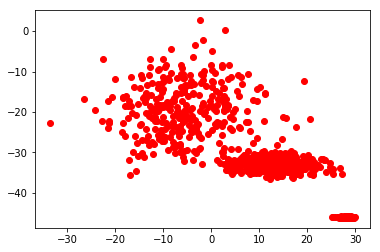

In [40]:
f1 = data[:, 0]
f2 = data[:, 1]
X = np.array(list(zip(f1, f2)))
plt.plot(f1, f2, 'ro')

### K-means

-46.19976441640597 29.946266821911138
Initial Centroids
[[-31. -30.]
 [  5.  -2.]
 [ 17. -45.]]


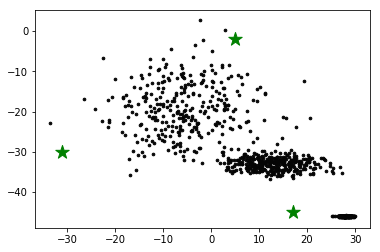

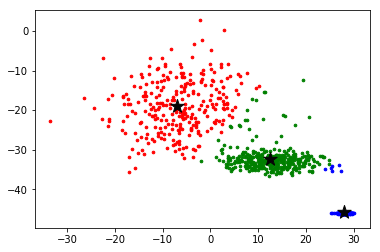

In [59]:
# code from https://github.com/mubaris/friendly-fortnight/blob/master/kmeans-from-scratch-and-sklearn.py

# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Number of clusters
k = 3
# X coordinates of random centroids
print(np.min(X), np.max(X))
C_x = np.random.randint(np.min(X[:,0]), np.max(X[:,0]), size=k)
# Y coordinates of random centroids
C_y = np.random.randint(np.min(X[:,1]), np.max(X[:,1]), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(C)

# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = np.copy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

### Contrast